# Regression Models 

In [167]:
# Imports 
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [168]:
# PPP loans data 
data = Path('./data/public_150k_plus_220102.csv')
df = pd.read_csv(data)
df.head(5)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,...,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,5/1/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,...,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,5/1/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,9/28/2021,...,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,746336.24,8/12/2021
2,5791407702,5/1/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,3/17/2021,...,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,2/10/2021
3,6223567700,5/1/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,...,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,NaN,395264.11,9/10/2021
4,9662437702,5/1/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,8/17/2021,...,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,4/8/2021


In [169]:
# Run a DataType check
df.dtypes

LoanNumber                       int64
DateApproved                    object
SBAOfficeCode                    int64
ProcessingMethod                object
BorrowerName                    object
BorrowerAddress                 object
BorrowerCity                    object
BorrowerState                   object
BorrowerZip                     object
LoanStatusDate                  object
LoanStatus                      object
Term                             int64
SBAGuarantyPercentage            int64
InitialApprovalAmount          float64
CurrentApprovalAmount          float64
UndisbursedAmount              float64
FranchiseName                   object
ServicingLenderLocationID        int64
ServicingLenderName             object
ServicingLenderAddress          object
ServicingLenderCity             object
ServicingLenderState            object
ServicingLenderZip              object
RuralUrbanIndicator             object
HubzoneIndicator                object
LMIIndicator             

In [181]:
# Prepare data 
loan_df = df[["BorrowerCity","BusinessType","OriginatingLenderLocationID", "OriginatingLender", "ForgivenessAmount"]]
loan_df.tail(5)

,BorrowerCity,BusinessType,OriginatingLenderLocationID,OriginatingLender,ForgivenessAmount
968533,CASPER,Corporation,42366,Platte Valley Bank,151037.50
968534,GREEN RIVER,Non-Profit Childcare Center,122813,NebraskaLand Bank,150789.04
968535,Rozet,Subchapter S Corporation,77189,First National Bank of Gillette,150743.84
968536,SHERIDAN,Corporation,25901,Small Business Bank,NaN
968537,TETON VILLAGE,Subchapter S Corporation,77193,Bank of Jackson Hole,152162.50


In [182]:
# Cleanse nulls from data 
loan_df = loan_df.dropna()

In [183]:
# Create a DataFrame
loan_df = pd.DataFrame(loan_df)
loan_df.tail(5)

,BorrowerCity,BusinessType,OriginatingLenderLocationID,OriginatingLender,ForgivenessAmount
968532,Newcastle,Corporation,77248,Pinnacle Bank-Wyoming,150661.64
968533,CASPER,Corporation,42366,Platte Valley Bank,151037.50
968534,GREEN RIVER,Non-Profit Childcare Center,122813,NebraskaLand Bank,150789.04
968535,Rozet,Subchapter S Corporation,77189,First National Bank of Gillette,150743.84
968537,TETON VILLAGE,Subchapter S Corporation,77193,Bank of Jackson Hole,152162.50


In [184]:
# Encode the categorical data using encoder from sklean
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
# Encode the BorrowerCity as an integer
label_encoder.fit(loan_df["BorrowerCity"])
loan_df["BorrowerCity_le"] = label_encoder.transform(loan_df["BorrowerCity"])

In [185]:
# Encode OriginatingLender data as an interger
label_encoder.fit(loan_df["OriginatingLender"])
loan_df["OriginatingLender_le"] = label_encoder.transform(loan_df["OriginatingLender"])

In [186]:
# Encode BusinessType data as an interger
label_encoder.fit(loan_df["BusinessType"])
loan_df["BusinessType_le"] = label_encoder.transform(loan_df["BusinessType"])

In [197]:
# Check status 
loan_df.head(10) 

,ForgivenessAmount,BorrowerCity_le,OriginatingLender_le,BusinessType_le
0,773553.37,22752,3347,5
1,746336.24,16437,3347,20
2,696677.49,20464,297,13
3,395264.11,20212,297,5
6,291741.75,21522,3347,13
13,9615884.57,279,2597,10
14,7761324.81,1115,2502,13
17,6598389.38,9730,1493,5
20,6461470.84,279,1134,5
21,5987841.44,17352,853,4


In [188]:
# Drop unnecessary columns from DataFrame 
loan_df = loan_df.drop(columns=['BorrowerCity'])
loan_df = loan_df.drop(columns=['BusinessType'])
loan_df = loan_df.drop(columns=['OriginatingLender'])
loan_df = loan_df.drop(columns=['OriginatingLenderLocationID'])

In [202]:
# Check status of DataFrame
loan_df

<bound method NDFrame.describe of         ForgivenessAmount  BorrowerCity_le  OriginatingLender_le  \
0               773553.37            22752                  3347   
1               746336.24            16437                  3347   
2               696677.49            20464                   297   
3               395264.11            20212                   297   
6               291741.75            21522                  3347   
...                   ...              ...                   ...   
968532          150661.64            16301                  2819   
968533          151037.50             3199                  2838   
968534          150789.04             8598                  2516   
968535          150743.84            19983                  1532   
968537          152162.50            22966                   367   

        BusinessType_le  
0                     5  
1                    20  
2                    13  
3                     5  
6                  

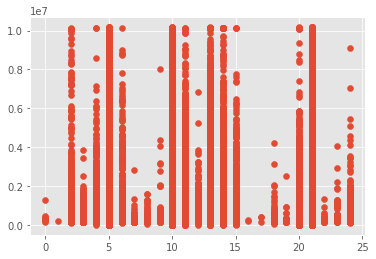

In [190]:
# Create a scatter plot of the data
plt.scatter(loan_df.BusinessType_le, loan_df.ForgivenessAmount)

In [191]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [192]:
# Separate the data into the X and y components
# In this case, y will be the `Price` and X will be the remaining columns
X = loan_df.ForgivenessAmount.values.reshape(-1, 1)
y = loan_df['BusinessType_le']

In [193]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [194]:
# Make predictions using the X data
predicted_y_values = model.predict(X)
predicted_y_values

array([10.3582787 , 10.35509299, 10.34928055, ..., 10.28538553,
       10.28538024, 10.28554629])

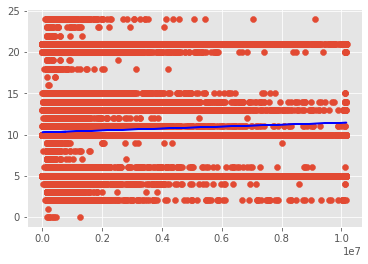

In [195]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='blue')

In [199]:
y

0          5
1         20
2         13
3          5
6         13
          ..
968532     5
968533     5
968534    12
968535    21
968537    21
Name: BusinessType_le, Length: 804868, dtype: int32

# FEMA Natural Disaster Data

In [138]:
# FEMA natural disaster csv
csv_file_disaster = Path('./data/FemaWebDisasterDeclarations.csv')
csv_file_disaster = pd.read_csv(csv_file_disaster)
csv_file_disaster.head(5)

,declarationType,stateName,incidentType
0,Emergency,American Samoa,Hurricane
1,Emergency,Virgin Islands of the U.S.,Hurricane
2,Major Disaster,New Mexico,Flood
3,Emergency,Florida,Hurricane
4,Emergency,Florida,Hurricane


In [139]:
disasterdata_df = pd.DataFrame(csv_file_disaster)

In [140]:
# Display DataFrame
csv_file_disaster.tail(5)

,declarationType,stateName,incidentType
4650,Fire Management,Texas,Fire
4651,Fire Management,Texas,Fire
4652,Major Disaster,Alaska,Severe Storm(s)
4653,Major Disaster,Puerto Rico,Flood
4654,Major Disaster,Washington,Flood


In [141]:
# Identify frequency values
disastertype_perstate = csv_file_disaster[['stateName','incidentType']].value_counts()
toptwenty_statenatdisast_df = disastertype_perstate.iloc[0:20]
toptwenty_statenatdisast_df 

stateName    incidentType   
California   Fire               273
Texas        Fire               255
Washington   Fire               126
Oklahoma     Fire               106
Oregon       Fire                98
Colorado     Fire                76
Nevada       Fire                74
Arizona      Fire                70
Florida      Fire                67
Montana      Fire                64
New Mexico   Fire                58
Florida      Hurricane           49
Oklahoma     Severe Storm(s)     44
Alabama      Severe Storm(s)     43
Texas        Flood               40
Kansas       Severe Storm(s)     39
Mississippi  Severe Storm(s)     38
Missouri     Severe Storm(s)     37
California   Flood               37
Louisiana    Hurricane           36
dtype: int64

In [142]:
toptwenty_statenatdisast_df = pd.DataFrame(toptwenty_statenatdisast_df)

In [143]:
toptwenty_statenatdisast_df["Frequency"] = csv_file_disaster[['stateName','incidentType']].value_counts()

In [144]:
toptwenty_statenatdisast_df = toptwenty_statenatdisast_df.drop(columns=[0])
toptwenty_statenatdisast_df

,,Frequency
stateName,incidentType,
California,Fire,273
Texas,Fire,255
Washington,Fire,126
Oklahoma,Fire,106
Oregon,Fire,98
Colorado,Fire,76
Nevada,Fire,74
Arizona,Fire,70
Florida,Fire,67


<AxesSubplot:title={'center':'Type of Natural Disaster Frequency Per State'}, ylabel='stateName,incidentType'>

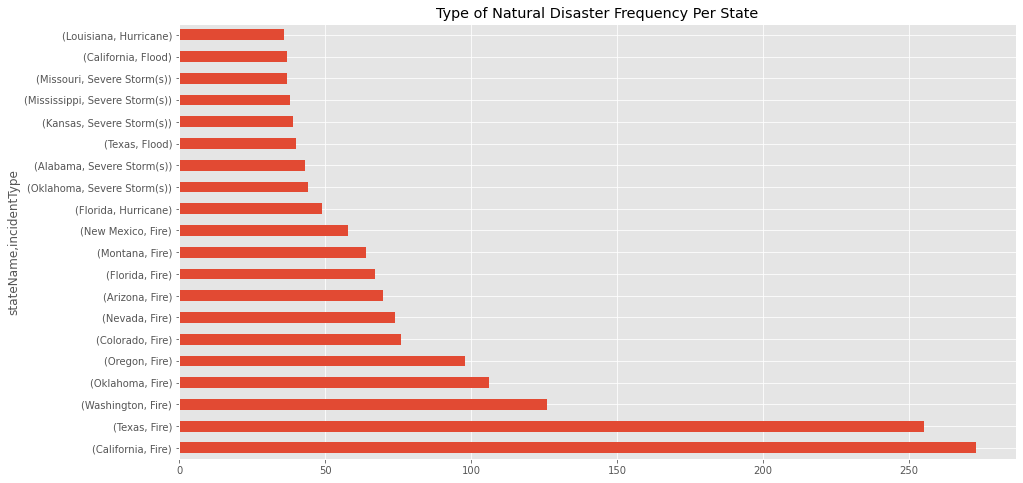

In [145]:
# Plot the top 20 natural disaster areas and types 
toptwenty_statenatdisast_df.plot(
    figsize=(15,8),
    kind='barh',
    legend=False,
    title="Type of Natural Disaster Frequency Per State",
)

In [146]:
# Binary encoding using Pandas (single column)
binary_encoded = pd.get_dummies(csv_file_disaster, columns=["stateName", "incidentType", "declarationType"])
binary_encoded.head()

,stateName_Alabama,stateName_Alaska,stateName_American Samoa,stateName_Arizona,stateName_Arkansas,stateName_California,stateName_Colorado,stateName_Connecticut,stateName_Delaware,stateName_District of Columbia,...,incidentType_Terrorist,incidentType_Tornado,incidentType_Toxic Substances,incidentType_Tsunami,incidentType_Typhoon,incidentType_Volcano,declarationType_Emergency,declarationType_Fire Management,declarationType_Fire Suppression,declarationType_Major Disaster
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [147]:
# Saving the encoded dataset
file_path = Path("./data/data_encoded.csv")
binary_encoded.to_csv(file_path, index=False)

In [148]:
# Creating the scaler instance
data_scaler = StandardScaler()

In [149]:
# Fitting the scaler
data_scaler.fit(binary_encoded)

StandardScaler()

In [150]:
# Transforming the data
data_scaled = data_scaler.transform(binary_encoded)
data_scaled[:5]

array([[-1.47409590e-01, -1.27966972e-01,  1.70275512e+01,
        -1.50424122e-01, -1.31392488e-01, -2.87329322e-01,
        -1.48923822e-01, -9.19177539e-02, -7.34817531e-02,
        -7.04660038e-02, -7.49450724e-02, -1.93498056e-01,
        -1.25340470e-01, -6.40184400e-02, -1.15231024e-01,
        -1.06287253e-01, -1.18069124e-01, -1.05248867e-01,
        -1.26221660e-01, -1.33074373e-01, -1.36380213e-01,
        -1.48923822e-01, -1.17130321e-01, -3.88075263e-02,
        -8.95104824e-02, -1.09345881e-01, -9.65582928e-02,
        -1.27097121e-01, -1.40410913e-01, -1.28831325e-01,
        -1.45880992e-01, -1.27097121e-01, -1.47409590e-01,
        -1.11340443e-01, -1.11340443e-01, -1.50424122e-01,
        -1.53384566e-01, -1.26221660e-01, -1.19925887e-01,
        -7.04660038e-02, -1.13301588e-01, -2.21124171e-01,
        -1.75440733e-01, -1.46584082e-02, -1.17130321e-01,
        -9.99023172e-02, -7.49450724e-02, -9.07218423e-02,
        -1.36380213e-01, -1.34736709e-01, -2.92986202e-0

In [152]:
# Loading data
file_path = Path("./data/data_encoded.csv")
df = pd.read_csv(file_path)
df.head()

,stateName_Alabama,stateName_Alaska,stateName_American Samoa,stateName_Arizona,stateName_Arkansas,stateName_California,stateName_Colorado,stateName_Connecticut,stateName_Delaware,stateName_District of Columbia,...,incidentType_Terrorist,incidentType_Tornado,incidentType_Toxic Substances,incidentType_Tsunami,incidentType_Typhoon,incidentType_Volcano,declarationType_Emergency,declarationType_Fire Management,declarationType_Fire Suppression,declarationType_Major Disaster
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [153]:
# Define features set
X = df.copy()
X.drop("incidentType_Hurricane", axis=1, inplace=True)
X.head()

,stateName_Alabama,stateName_Alaska,stateName_American Samoa,stateName_Arizona,stateName_Arkansas,stateName_California,stateName_Colorado,stateName_Connecticut,stateName_Delaware,stateName_District of Columbia,...,incidentType_Terrorist,incidentType_Tornado,incidentType_Toxic Substances,incidentType_Tsunami,incidentType_Typhoon,incidentType_Volcano,declarationType_Emergency,declarationType_Fire Management,declarationType_Fire Suppression,declarationType_Major Disaster
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [154]:
# Define target vector
y = df["incidentType_Hurricane"].values.reshape(-1, 1)
y[:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int64)

In [155]:
# Splitting into Train and Test sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [156]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [157]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [158]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [159]:
# Creating the decision tree classifier instance
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [160]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

In [161]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

In [162]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [163]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1047,2
Actual 1,0,115


Accuracy Score : 0.9982817869415808
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       0.98      1.00      0.99       115

    accuracy                           1.00      1164
   macro avg       0.99      1.00      1.00      1164
weighted avg       1.00      1.00      1.00      1164



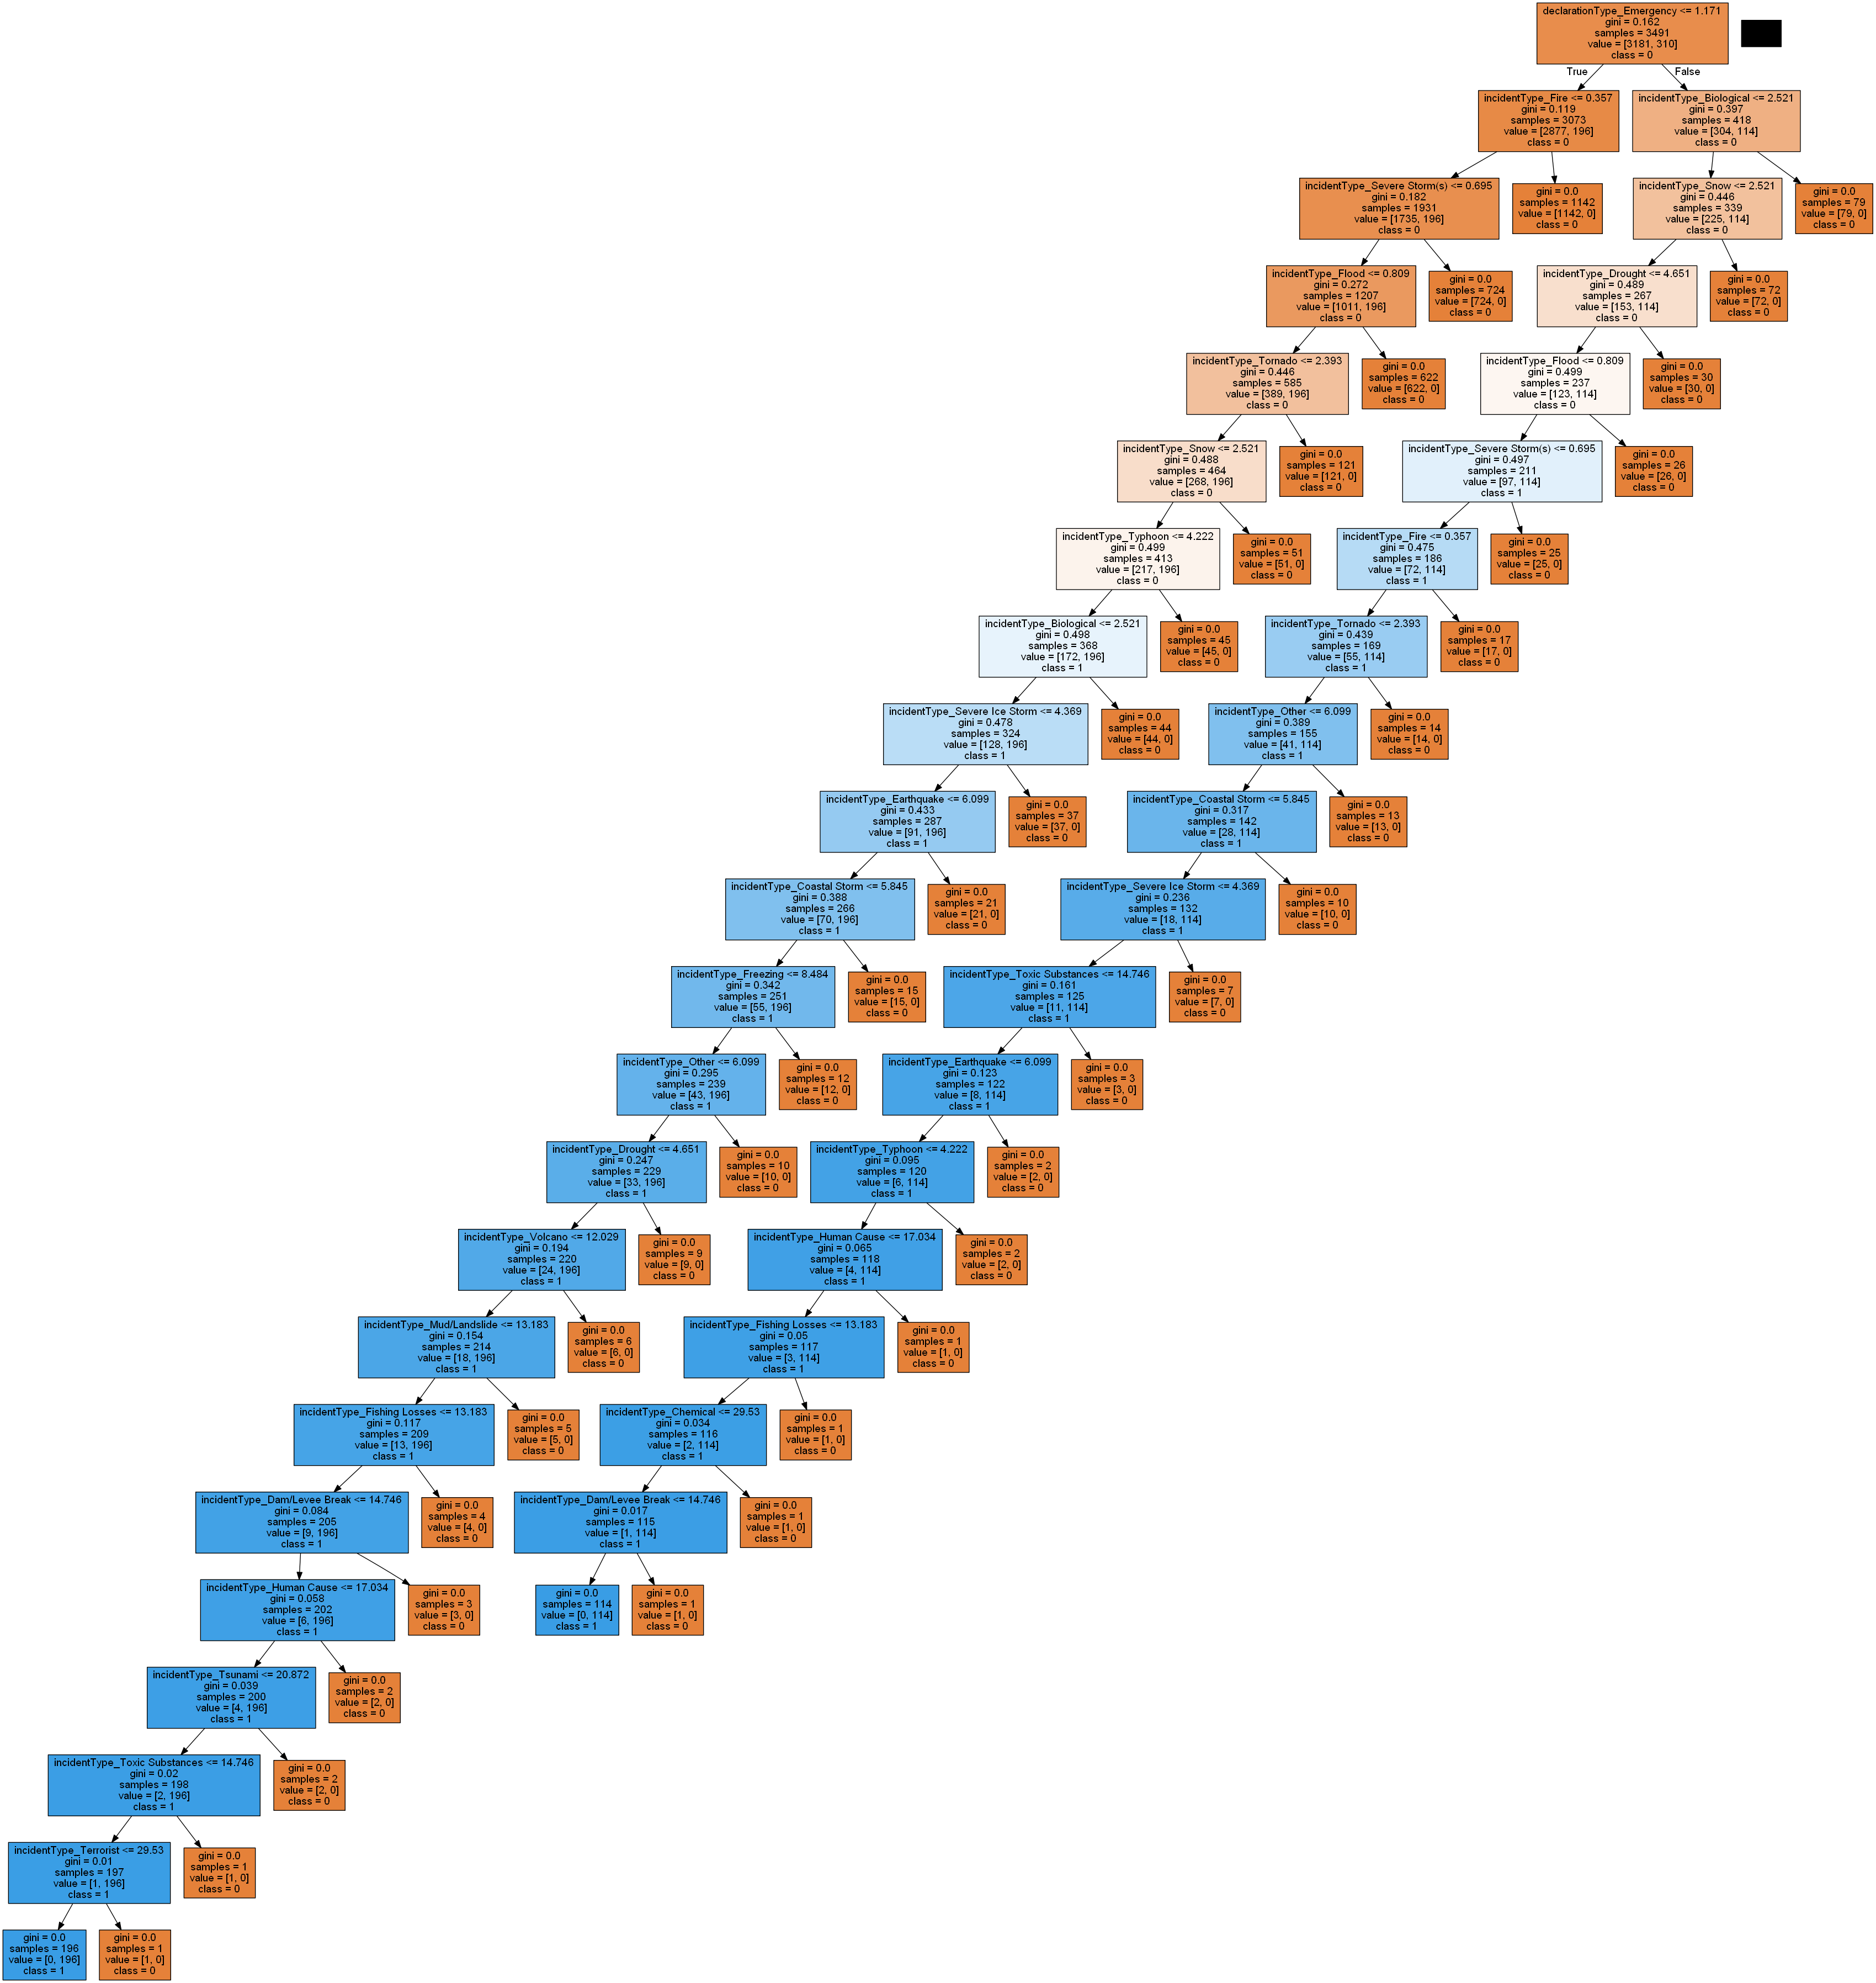

In [164]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [165]:
# Saving the tree as PDF
file_path = ("./data/tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("./data/tree.png")
graph.write_png(file_path)

True